<a href="https://colab.research.google.com/github/xqyn/modeling/blob/main/grok_random_walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

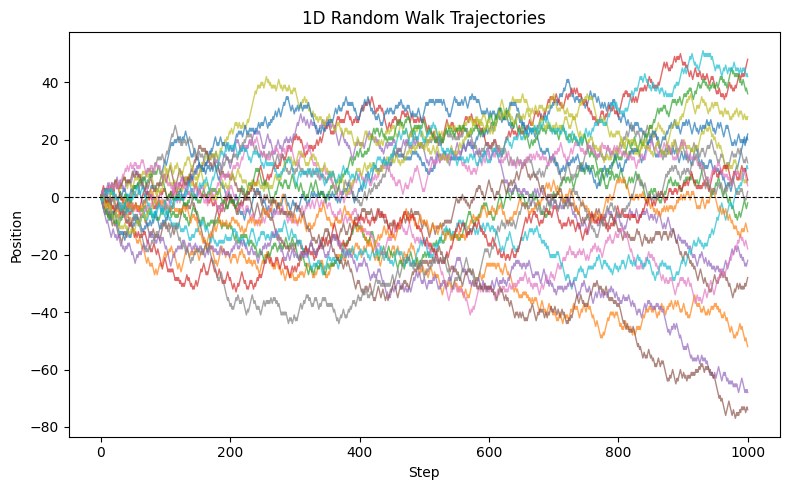

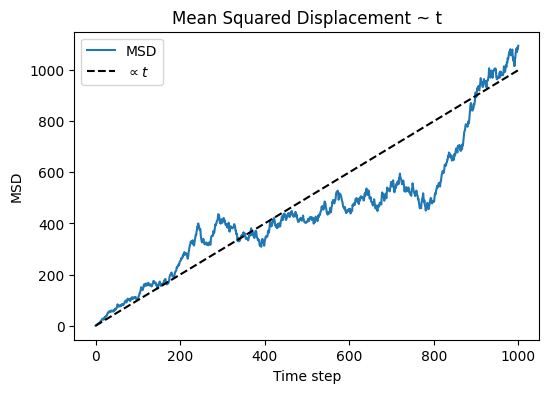

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def random_walk_1d(steps=1000, num_walks=50, seed=None):
    """
    Simulate multiple 1D symmetric random walks.

    Parameters:
    - steps: int, number of steps per walk
    - num_walks: int, number of independent walks
    - seed: int or None, for reproducibility

    Returns:
    - trajectories: (num_walks, steps+1) array of positions
    """
    if seed is not None:
        np.random.seed(seed)

    # Each step: +1 or -1
    steps_array = np.random.choice([-1, 1], size=(num_walks, steps))
    # Cumulative sum to get positions (start at 0)
    trajectories = np.cumsum(steps_array, axis=1)
    trajectories = np.hstack([np.zeros((num_walks, 1)), trajectories])  # add t=0
    return trajectories

# Example usage
traj = random_walk_1d(steps=1000, num_walks=20, seed=42)

# Plot
plt.figure(figsize=(8, 5))
for i in range(traj.shape[0]):
    plt.plot(traj[i], lw=1, alpha=0.7)
plt.axhline(0, color='k', linestyle='--', lw=0.8)
plt.title("1D Random Walk Trajectories")
plt.xlabel("Step")
plt.ylabel("Position")
plt.tight_layout()
plt.show()

# Mean squared displacement
msd = np.mean(traj**2, axis=0)
plt.figure(figsize=(6, 4))
plt.plot(msd, label="MSD")
plt.plot(np.arange(len(msd)), np.arange(len(msd)), 'k--', label=r"$\propto t$")
plt.xlabel("Time step")
plt.ylabel("MSD")
plt.legend()
plt.title("Mean Squared Displacement ~ t")
plt.show()